# Putting Twitch Stream Data Through The Data Science Pipeline
By: Joseph Chan


## Introduction
In this tutorial we will use the data science pipeline to explore and analyize community metrics from the top streamers on Twitch.

### Background
Twitch is currently one of the most popular gaming and variety streaming servives home to millions of streamers and millions more viewers. Popular streamers have active communities that will consistently tune in and chat with the streamer or each other. Often it is a streamer's community and its growth that defines a streamer's career.

### Libraries
- Pandas: To display and manage our data
- Numpy: To perform operations on our data
- Seaborn: To create plots
- Matplotlib: To format and display plots

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Data
The dataset we will be using is on Kaggle here: https://www.kaggle.com/aayushmishra1512/twitchdata

After downloading and extracting, you will have a csv (comma-separated values) file titled: twitchdata-update.csv

Copy the csv file into the working directory of your Jupyter Notebook or include the path to it in .read_csv(). Then, using Pandas we can read in the csv file and store it in a Pandas dataframe

In [210]:
# Pandas read_csv('<.csv file>') imports and converts the file to a dataframe and stores it in 'data'
data = pd.read_csv('twitchdata-update.csv')
# .head() shows the first few rows of the dataframe
data.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


## About the Data
The dataset consists of the top 1000 streamers from one year and their respective stats which include:
- Channel Name
- Watch & Stream Time (Minutes)
- Peak & Average Viewers
- Followers
- Followers & Views Gained
- Whether they are partnered with Twitch
- Whether they stream 18+ content
- The primary language spoken on the channel

## Poking Around the Data
We can start by creating a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) of correlations to see if there are any strong relationships between our columns.

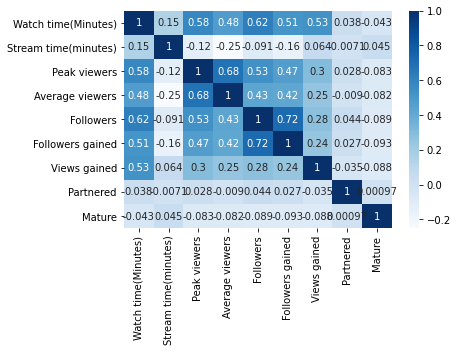

In [211]:
# We calculate correlations here
corr = data.corr()
# Seaborn plots our correlations
# annot show each block's values and cmap is the color theme
sns.heatmap(corr, annot = True, cmap='Blues')
# Matplotlib displays our plot
plt.show()

### First Glance Analysis
Based on the heatmap, the strongest correlation found is between followers and followers gained at 0.74 which is a very strong relationship. From this alone many questions arise as to why a channel having many followers seems to attract people.

Some other prominent relationships are:
- Average Viewers and Peak Viewers: 0.68
- Followers and Watch Time: 0.62
- Peak Viewers and Watch Time: 0.58
- Followers and Peak Viewers: 0.53
- Views Gained and Watch Time: 0.53
- Followers Gained and Watch Time: 0.51

In general, the varibles that seem particulary interesting due to many strong correlations are:
- Watch Time
- Peak Viewers
- Average Viewers
- Followers
- Followers Gained

## Exploring the Relationships
We know these variables are closely related however we do not know how they correlate. We will plot them against each other to pull some potentially useful visual insights.

First we will plot the most strongly correlated relationship: followers against followers. We are using Seaborn's [regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html) over thier [lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html) because regplot automatically calculates a linear trendline for us and we are most interested in that line. While we can use lineplot, it will attempt to draw a jaggy line between each data point which is not useful and more work to then add a linear regression line.

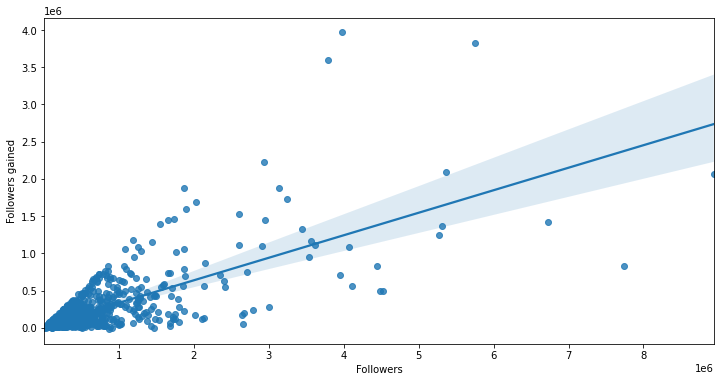

In [212]:
# plt.figure creates a canvas on which to place our seaborn plot
plt.figure(figsize=(12,6))
# we use seaborn's regplot which shows a linear regression line to visualize the trend
sns.regplot(x=data['Followers'], y=data['Followers gained'])
# plot.show() displays the plt.figure
plt.show()

The trendline shows an increasing trend between more followers and increased followers gained. This implies that those with more followers will increase said follower count at greater rates.

After confirming the previous relationship and we naturally turn our attention to the other strongly correlated relationships we found eariler the value of exploring these realtionships comes into question. When we plot one of these relationships such as watch time against followers be have the following plot:

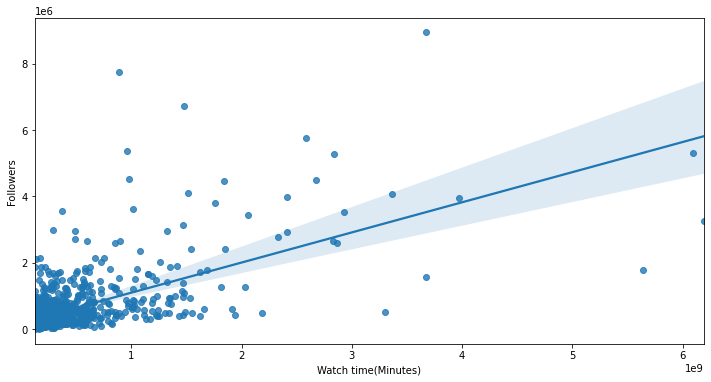

In [213]:
# plt.figure creates a canvas on which to place our seaborn plot
plt.figure(figsize=(12,6))
# we use seaborn's regplot which shows a linear regression line to visualize the trend
sns.regplot(x=data['Watch time(Minutes)'], y=data['Followers'])
# plot.show() displays the plt.figure
plt.show()

### Surface-Level Relationships
While the above plot does display a relationship the value is almost trivial. We must consider whether a relationship is worth looking into. In the case of watch time against followers, it's a seemingly natural to assume the more followers someone has the more people watch that particular stream and hence, result in more watch time. We can and did comfirm this relationship for the sake of example. However the rest of the relationships fall under this "surface-level" analysis and we will skip the other realtionships.

## Looking Beyond Numerial Data
The correlation heatmap is incredibly useful however it does not correlate the non-numerical factors in our dataset which are partnered, mature, and language. But what can we compare these non-numerical values to? Looking back at our correlation heatmap, watch time and followers seem to be importent metrics with many correlated realtionships.

We will use plot these factors are [boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) because we are plotting numbers against a few types of data such as True or False.
### Partnered

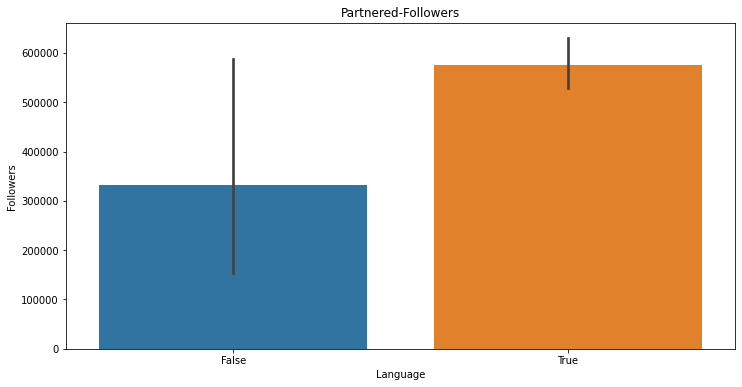

In [214]:
# figsize allows us to change the size and shape of the canvas on which we place our plot
# we use 12,6 (width, height) on our two column barplots because we are primarily looking at the y-axis on few x-axis points
plt.figure(figsize=(12,6))
# Seaborn provides barplots for us
sns.barplot(x=data['Partnered'], y=data['Followers'])
# Matplotlib gives us the option to title and label our figures 
plt.xlabel('Language')
plt.ylabel('Followers')
plt.title('Partnered-Followers')
plt.show()

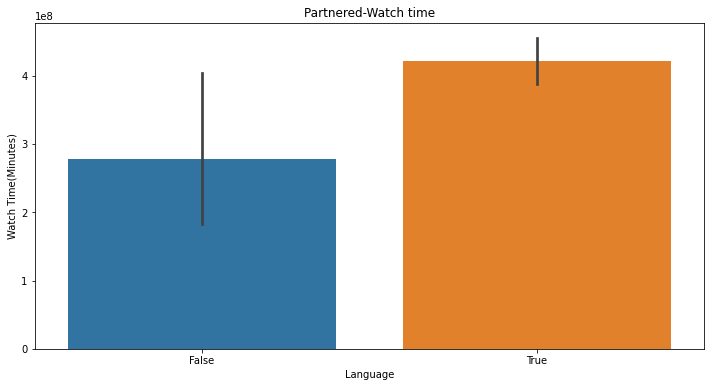

In [215]:
plt.figure(figsize=(12,6))
sns.barplot(x=data['Partnered'], y=data['Watch time(Minutes)'])
plt.xlabel('Language')
plt.ylabel('Watch Time(Minutes)')
plt.title('Partnered-Watch time')
plt.show()

From the plots above, there is little relative difference between followers and watch time in relation to partnership. In addition, if a streamer is partnered with Twitch in general they have more watch time and followers. But one must also consider the inverse correlation that high watch time and follower counts result in a streamer becoming a Twitch partner.

### Mature Content

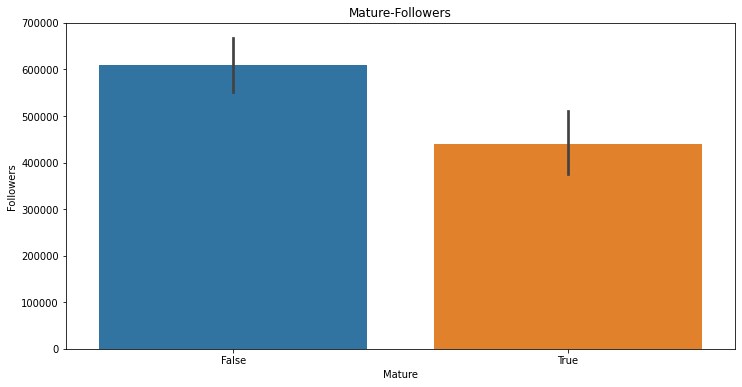

In [216]:
plt.figure(figsize=(12,6))
sns.barplot(x=data['Mature'], y=data['Followers'])
plt.xlabel('Mature')
plt.ylabel('Followers')
plt.title('Mature-Followers')
plt.show()

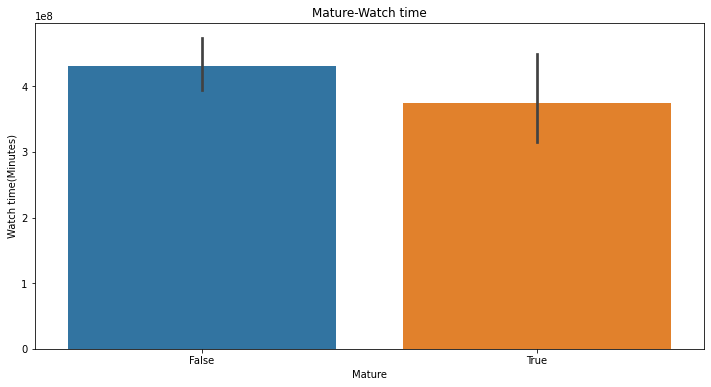

In [217]:
plt.figure(figsize=(12,6))
sns.barplot(x=data['Mature'], y=data['Watch time(Minutes)'])
plt.xlabel('Mature')
plt.ylabel('Watch time(Minutes)')
plt.title('Mature-Watch time')
plt.show()

Again, we see little visual difference between followers and watch time. In this case however, a streamer tends to have more followers and watch time if they do **not** stream mature content.

### Language

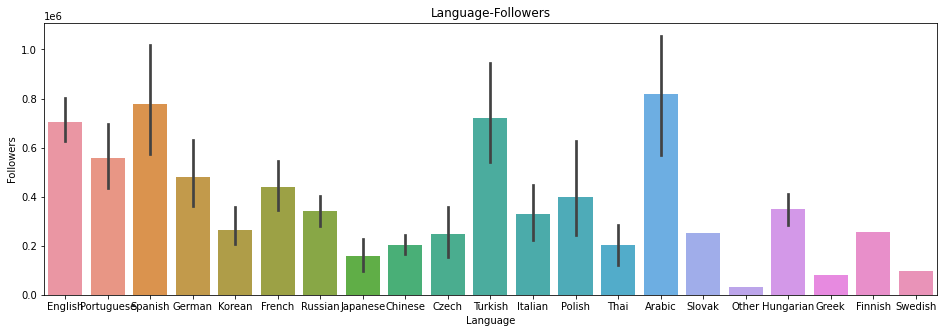

In [218]:
plt.figure(figsize=(16,5))
sns.barplot(x=data['Language'], y=data['Followers'])
plt.xlabel('Language')
plt.ylabel('Followers')
plt.title('Language-Followers')
plt.show()

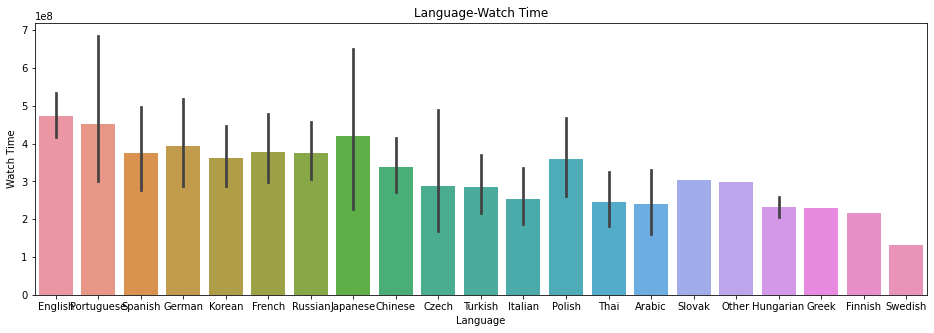

In [219]:
plt.figure(figsize=(16,5))
sns.barplot(x=data['Language'], y=data['Watch time(Minutes)'])
plt.xlabel('Language')
plt.ylabel('Watch Time')
plt.title('Language-Watch Time')
plt.show()

Here, we find differences between followers and watch time. For instance, Japanese streams account for a very small proportion of followers yet have one of the highest amounts of watch time. Perhaps a stream's primary language may significantly affect the watch time per follower. To investigate this, we will plot language against watch time/follower to find watch time per follower.

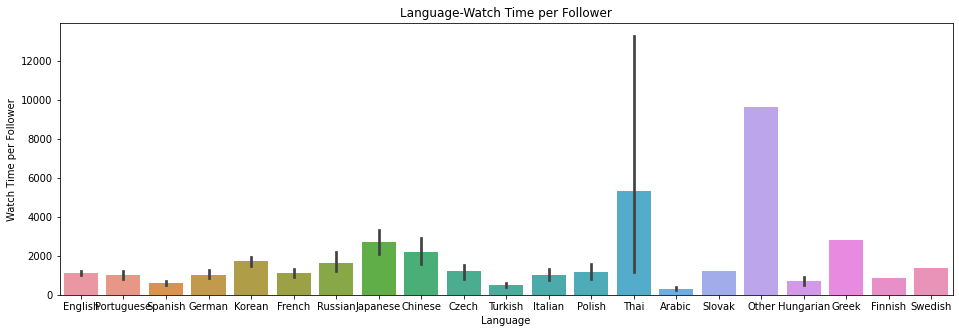

In [220]:
plt.figure(figsize=(16,5))
sns.barplot(x=data['Language'], y=data['Watch time(Minutes)']/data['Followers'])
plt.xlabel('Language')
plt.ylabel('Watch Time per Follower')
plt.title('Language-Watch Time per Follower')
plt.show()

## Results of our Exploration
From poking around the data and visualizing the data via plots, we have found strong relationships. One such exmaple is between watch time and followers such that when comparing the two against a third factor like whether a streamer is partnered we can expect the two resulting relationships to be similar. In addition we have found non-numerical categories including partnership, mature content, and language to be significant factors. Then while exloring language, we also found an interesting relationship between the primary language spoken on a channel and its respective watch time per follower.

# Conclusion
During this tutorial we took Twitch statistics through the data science pipeline: importing, analyzing, hypothesizing and making predictions on the data. Through this process we were able to understand how many of the numerical metrics were so closely related they can be considered the same varible at times. With this initial understanding we delved into a categorical analysis where we discovered an interesting relationship between language and the average follower's watch time. Finally we were able to relatively accurately predict the amount of followers a streamer has using a linear regression model.